In [4]:
import requests
base_url = 'http://localhost:2000'

In [5]:
class Session(requests.Session):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.headers.update({'Content-Type': 'application/json'})
    
    def get(self, url, *args, **kwargs):
        return super().get(base_url + url, *args, **kwargs)
    
    def post(self, url, *args, **kwargs):
        return super().post(base_url + url, *args, **kwargs)
    
    def patch(self, url, *args, **kwargs):
        return super().patch(base_url + url, *args, **kwargs)
    
    def delete(self, url, *args, **kwargs):
        return super().delete(base_url + url, *args, **kwargs)

client = Session()
resp = client.get("/ping")
resp.json()

{'message': 'pong!'}

In [6]:
import os
import sys

backend_path = os.path.abspath(os.path.join(os.getcwd(), '../backend'))
sys.path.append(backend_path)
from app.internal.firebase import db

/Users/aaryanpagar/Library/Python/3.11/lib/python/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [53]:
query = "Nip IND ETF Junior BeES".upper()
print(query)


docs = await db.collection("tickers").where("name", ">=", query).where("name", "<=", query + '\uf8ff').get()
# doc = await db.collection("tickers").where("ticker", "<=", query).where("ticker", ">=", query + "~").get()

if docs:
    print(docs[0].to_dict())

print(docs)

NIP IND ETF JUNIOR BEES
{'created_at': '2024-05-05T12:20:40.104545Z', 'exchange': 'NSE', 'lot_size': 1, 'upstox_instrument_key': 'NSE_EQ|INF732E01045', 'exchange_token': 10939, 'updated_at': '2024-05-05T12:20:40.104547Z', 'ticker': 'JUNIORBEES', 'instrument_type': 'EQUITY', 'name': 'NIP IND ETF JUNIOR BEES'}


/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_8262/3214706254.py:5: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  docs = await db.collection("tickers").where("name", ">=", query).where("name", "<=", query + '\uf8ff').get()


In [61]:
from datetime import datetime
date = datetime.now()
print(date.strftime("%Y-%m-%d"))

2024-05-05


In [62]:
def format_date_path(date: datetime) -> str:
    return date.strftime("%Y-%m-%d")

In [5]:
from datetime import datetime
from typing import Dict, Optional, Annotated
from pydantic import BaseModel, Field, validator, StringConstraints

def format_date_path(date: datetime) -> str:
    try:
        return date.strftime("%Y-%m-%d")
    except:
        raise ValueError(f"Invalid date format {date}")
        
def validate_date_path(date: str):
    try:
        datetime.strptime(date, "%Y-%m-%d")
    except:
        raise ValueError(f"Invalid date format {date}")

class CandleBase(BaseModel):
    open: float
    high: float
    low: float
    close: float
    volume: int
    open_interest: Optional[int] = None

class MonthlyCandleBase(BaseModel):
    month: Annotated[str, StringConstraints(pattern=r"^(0[1-9]|1[0-2])$")]
    year: Annotated[str, StringConstraints(pattern=r"^(19\d{2}|20\d{2})$")]
    daily: Dict[str, CandleBase] = Field(default_factory=dict)
    monthly: Optional[CandleBase] = None

    @validator("daily", pre=True, allow_reuse=True)
    def validate_daily(cls, v):
        for key in v:
            validate_date_path(key)
        return v

/var/folders/lq/280gf8ld14v161g6ngpdjjnc0000gn/T/ipykernel_52500/2471255407.py:31: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.6/migration/
  @validator("daily", pre=True, allow_reuse=True)


In [29]:
ticker = "100"
date_from = "2015-01-21"
date_to = "2016-01-20"
params = {"start_date": date_from, "end_date": date_to}
resp = client.get(f"/tickers/{ticker}/candles", params=params)

resp.json()

{'2016-01-01': {'open': 864.55,
  'high': 871.0,
  'low': 860.2,
  'close': 867.45,
  'volume': 175063,
  'open_interest': 0},
 '2016-01-04': {'open': 868.05,
  'high': 879.0,
  'low': 865.0,
  'close': 870.6,
  'volume': 274274,
  'open_interest': 0},
 '2016-01-05': {'open': 871.0,
  'high': 878.0,
  'low': 868.2,
  'close': 871.0,
  'volume': 442613,
  'open_interest': 0},
 '2016-01-06': {'open': 871.7,
  'high': 884.7,
  'low': 855.1,
  'close': 861.8,
  'volume': 251918,
  'open_interest': 0},
 '2016-01-07': {'open': 857.3,
  'high': 859.5,
  'low': 835.2,
  'close': 838.25,
  'volume': 180042,
  'open_interest': 0},
 '2016-01-08': {'open': 846.0,
  'high': 852.75,
  'low': 825.3,
  'close': 845.35,
  'volume': 210505,
  'open_interest': 0},
 '2016-01-11': {'open': 840.0,
  'high': 845.9,
  'low': 828.9,
  'close': 841.25,
  'volume': 126301,
  'open_interest': 0},
 '2016-01-12': {'open': 841.85,
  'high': 851.8,
  'low': 831.85,
  'close': 834.8,
  'volume': 124804,
  'open_intere

In [4]:
date_from = "2024-01-01"
date_to = "2024-02-02"
date_from <= date_to

True

In [11]:
date = "2024-07-02"
id = "SCAW_0001"
start_date = "2016-01-01"
end_date = "2024-05-20"
params = {"start_date": start_date, "end_date": end_date}

resp = client.get(f"/smallcases/{id}/indexes", params=params)
resp.json()

{'2018-07-17': {'smallcase': 100.0,
  'benchmark': 100.0,
  'kelly': None,
  'rebalance_occured': True},
 '2018-07-18': {'smallcase': 99.33,
  'benchmark': 99.63,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-19': {'smallcase': 99.29,
  'benchmark': 99.37,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-20': {'smallcase': 99.52,
  'benchmark': 99.87,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-23': {'smallcase': 100.22,
  'benchmark': 100.68,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-24': {'smallcase': 100.5,
  'benchmark': 101.41,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-25': {'smallcase': 100.55,
  'benchmark': 101.38,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-26': {'smallcase': 100.63,
  'benchmark': 101.78,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-27': {'smallcase': 100.77,
  'benchmark': 102.77,
  'kelly': None,
  'rebalance_occured': False},
 '2018-07-30': {'smallcase': 101.1,
  

In [13]:
from google.cloud import firestore

q = db.collection("smallcases/SCAW_0001/constituents").order_by("__name__").limit(1)

docs = await q.get()

for doc in docs:
    print(doc.id)

2018-07


In [18]:
vol = "High Volatility"
x = await db.collection("smallcases").get()

In [43]:
from datetime import datetime
av = 0
today = datetime.now()
for doc in x:
    smallcase = doc.to_dict()
    ratios = await db.document(f"smallcases/{doc.id}/statistics/2024-05").get()
    ratios = ratios.to_dict()

    launch_date = datetime.strptime(smallcase["launch_date"].split("T")[0], "%Y-%m-%d")
    years = (today - launch_date).days / 365
    p = {}
    p["name"] = smallcase["name"]
    p["years"] = years
    p["constituents"] = smallcase["constituent_count"]
    p["strategies"] = smallcase["investment_strategies"]
    p["volatility"] = smallcase["volatility"]
    p["market"] = ratios["weightage"]
    print(p)


print(av/len(x))

{'name': 'All Weather Investing', 'years': 5.904109589041096, 'constituents': 4, 'strategies': ['assetAllocation', 'quantitative'], 'volatility': 'Low Volatility', 'market': {'small_cap': 0.0, 'mid_cap': 0.0, 'large_cap': 43.40350732}}
{'name': 'Dividend Stars', 'years': 8.186301369863013, 'constituents': 11, 'strategies': ['dividend', 'fundamental'], 'volatility': 'Medium Volatility', 'market': {'small_cap': 53.99999999999999, 'market_category': 'Small cap', 'mid_cap': 9.0, 'large_cap': 37.0}}
{'name': 'Dividend Aristocrats', 'years': 8.186301369863013, 'constituents': 14, 'strategies': ['dividend', 'fundamental'], 'volatility': 'Medium Volatility', 'market': {'small_cap': 15.364600407341115, 'market_category': 'Mid cap', 'mid_cap': 38.41150101835279, 'large_cap': 46.22389857031129}}
{'name': 'Safe Haven', 'years': 7.879452054794521, 'constituents': 13, 'strategies': ['fundamental', 'technical'], 'volatility': 'Medium Volatility', 'market': {'small_cap': 61.538461536, 'market_category

In [2]:

uuid1 = "b8b0a3a1-7a0b-4b0e-9d8f-9f4a6b5f7d6b"
uuid2 = "b3b0a3d1-7a0c-4b0m-9d8f-8f4a6b5f7d6b"
data = (str(uuid1) + "|" + str(uuid2)).encode()
data

b'b8b0a3a1-7a0b-4b0e-9d8f-9f4a6b5f7d6b|b3b0a3d1-7a0c-4b0m-9d8f-8f4a6b5f7d6b'

In [9]:
import bcrypt
def hash_password(password: str) -> str:
    return bcrypt.hashpw(password.encode("utf-8"), bcrypt.gensalt())

def verify_password(password: str, hashed: str) -> bool:
    return bcrypt.checkpw(password.encode("utf-8"), hashed)

p = "password"

h = hash_password(p)
h

x = verify_password(p, h)
x

True

In [1]:
# from firebase_admin import initialize_app, auth

# app = initialize_app()
# uid = ""
# auth.set_custom_user_claims(uid, {"is_admin": True})

In [2]:
import requests

url = "http://localhost:2021"

resp = requests.get(url, timeout=3)
resp.status_code

200

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


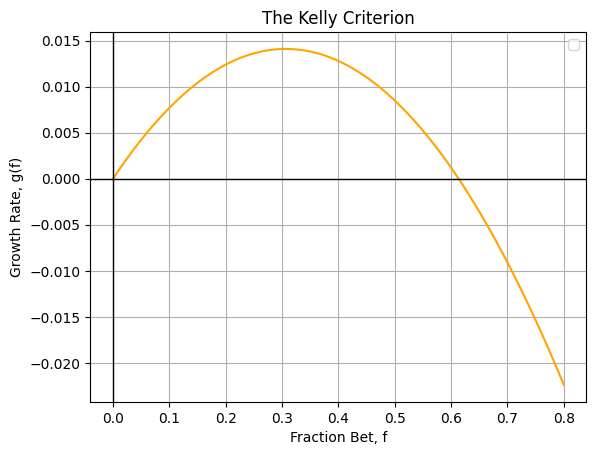

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define the adjusted function
def my_adjusted_function(x):
    return x * (0.16 - 0.068) - (x**2 * 0.30) / 2

# Generate x values
x_values = np.linspace(0, 0.8, 400)
# Compute y values
y_values = my_adjusted_function(x_values)

# Plot the function
plt.plot(x_values, y_values, color="orange")
plt.xlabel("Fraction Bet, f")
plt.ylabel("Growth Rate, g(f)")
plt.title("The Kelly Criterion")
plt.axhline(0, color="black",linewidth=1)
plt.axvline(0, color="black",linewidth=1)
plt.legend()
plt.grid(True)
plt.show()
